# PART 2.0 imports and method definitions

In [1]:
#imports
%run grid
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Grid parameters
# Top left corner of the area
MAP_LAT = 46.5
MAP_LON = 6.55

# Total area size
MAP_SIZE_LAT = 0.07
MAP_SIZE_LON = 0.10

# Number of cells
CELL_NUM_LAT = 10
CELL_NUM_LON = 10

# Grid lines
GRID_LAT_POINTS = [MAP_LAT + i * (MAP_SIZE_LAT / CELL_NUM_LAT)
                   for i in range(1, CELL_NUM_LAT + 1)]
GRID_LON_POINTS = [MAP_LON + i * (MAP_SIZE_LON / CELL_NUM_LON)
                   for i in range(1, CELL_NUM_LON + 1)]

In [3]:
#import queries and separate timestamp to day and time, where day is number from 0 to 6 with 0 being sunday, 1 monday...

queries = pd.read_csv("queries.csv", encoding = "utf-8")

time_of_day = queries['timestamp'] % 24
day_of_week = (queries['timestamp'] // 24 + 1) % 7 
queries['time_of_day'] = time_of_day
queries['day_of_week'] = day_of_week

In [4]:
pois = pd.read_csv("pois.csv", encoding = "utf-8")

#add number for type of poi type query for ease with colors and labels
query_types = set(pois['poi_type'].values)
types = {}
j = 0
for i in query_types:
    types[i] = j
    j += 1

print(types)


queries['query_type_num'] = queries.apply (lambda row: types.get(row['poi_type_query']), axis=1)
pois['poi_type_num'] = pois.apply (lambda row: types.get(row['poi_type']), axis=1)

{'villa': 0, 'supermarket': 1, 'bar': 2, 'cafeteria': 3, 'office': 4, 'company': 5, 'club': 6, 'gym': 7, 'restaurant': 8, 'laboratory': 9, 'dojo': 10, 'appartment_block': 11}


In [5]:
pois

poi_id  cell_id     poi_type        lat       lon  poi_type_num
0        307        1          bar  46.504486  6.559631             2
1        331        1          bar  46.500259  6.554721             2
2        578        1  supermarket  46.506017  6.551165             1
3        897        1         club  46.504494  6.553889             6
4        972        1  supermarket  46.502984  6.550519             1
...      ...      ...          ...        ...       ...           ...
1055     372      100   restaurant  46.563852  6.648454             8
1056     649      100          bar  46.564047  6.640250             2
1057     730      100          gym  46.565961  6.642228             7
1058     828      100         club  46.569177  6.642401             6
1059     990      100          bar  46.565290  6.640855             2

[1060 rows x 6 columns]

In [6]:
queries

ip_address        lat       lon   timestamp poi_type_query  \
0      34.101.177.245  46.532942  6.591174   14.912448      cafeteria   
1      34.101.177.245  46.532942  6.591174   14.912448     restaurant   
2      34.101.177.245  46.550342  6.602852   18.024657     restaurant   
3      34.101.177.245  46.550342  6.602852   18.024657      cafeteria   
4      34.101.177.245  46.532942  6.591174   36.334539      cafeteria   
...               ...        ...       ...         ...            ...   
20438     11.173.13.2  46.524410  6.625246  449.159554    supermarket   
20439     11.173.13.2  46.527363  6.628705  453.426750    supermarket   
20440     11.173.13.2  46.527363  6.628705  453.426750            gym   
20441     11.173.13.2  46.524410  6.625246  464.420041    supermarket   
20442     11.173.13.2  46.527363  6.628705  464.420041     restaurant   

       time_of_day  day_of_week  query_type_num  
0        14.912448          1.0               3  
1        14.912448          1.0               8  
2        18.024657          1.0               8  
3        18.024657          1.0               3  
4        12.334539          2.0               3  
...            ...          ...             ...  
20438    17.159554          5.0               1  
20439    21.426750          5.0               1  
20440    21.426750          5.0               7  
20441     8.420041          6.0               1  
20442     8.420041          6.0               8  

[20443 rows x 8 columns]

In [7]:
#when a query is done, poi_type_query indicates what he searched for, but in pois we have types of locations for all coords
# -> append to query from pois the type of location someone is while searching
poitypes = pois[['poi_type', 'lat', 'lon', 'poi_type_num']].copy()
full_queries = queries.merge(poitypes, on=['lat', 'lon'])

print(full_queries.isnull().values.any()) 
#no values are nan thus all points from where the searches occured, have types in db
#-> we know exactly what type of building the user is in
full_queries

False


ip_address        lat       lon   timestamp poi_type_query  \
0      34.101.177.245  46.532942  6.591174   14.912448      cafeteria   
1      34.101.177.245  46.532942  6.591174   14.912448     restaurant   
2      34.101.177.245  46.532942  6.591174   36.334539      cafeteria   
3      34.101.177.245  46.532942  6.591174   36.334539     restaurant   
4      34.101.177.245  46.532942  6.591174   59.359388      cafeteria   
...               ...        ...       ...         ...            ...   
20438   88.32.125.209  46.557406  6.636327   92.292035     restaurant   
20439   88.32.125.209  46.557406  6.636327  454.560347           dojo   
20440   88.32.125.209  46.557406  6.636327  454.560347    supermarket   
20441     11.173.13.2  46.525482  6.571666  296.602028    supermarket   
20442     11.173.13.2  46.525056  6.574907  296.602028            gym   

       time_of_day  day_of_week  query_type_num     poi_type  poi_type_num  
0        14.912448          1.0               3      company             5  
1        14.912448          1.0               8      company             5  
2        12.334539          2.0               3      company             5  
3        12.334539          2.0               8      company             5  
4        11.359388          3.0               3      company             5  
...            ...          ...             ...          ...           ...  
20438    20.292035          4.0               8         dojo            10  
20439    22.560347          5.0              10         dojo            10  
20440    22.560347          5.0               1         dojo            10  
20441     8.602028          6.0               1         dojo            10  
20442     8.602028          6.0               7  supermarket             1  

[20443 rows x 10 columns]

In [8]:
#set lon lat coords to image coordinates

def coord_trans(lon, lat):
    scale_x = 580 / MAP_SIZE_LON
    scale_y = 589 / MAP_SIZE_LAT

    x = (lon - MAP_LON) * scale_x
    y = (MAP_LAT - lat) * scale_y + 589
    return x, y

#inverse transform from image coord to lat lon (used for perturb)
def inv_trans(x,y):
    scale_x = 580 / MAP_SIZE_LON
    scale_y = 589 / MAP_SIZE_LAT
    
    lat = -((y - 589)/scale_y - MAP_LAT)
    lon = x/scale_x + MAP_LON
    
    return lon, lat

#add image coordinates in pois
x = []
y = []
for lon, lat in zip(pois.lon, pois.lat):
    a, b = coord_trans(lon, lat)
    x.append(a)
    y.append(b)
    
pois['x'] = x
pois['y'] = y

#add image coordinates in querries
x = []
y = []
for lon, lat in zip(queries.lon, queries.lat):
    a, b = coord_trans(lon, lat)
    x.append(a)
    y.append(b)
queries['x'] = x
queries['y'] = y

#add image coordinates in fullquerries

x = []
y = []
for lon, lat in zip(full_queries.lon, full_queries.lat):
    a, b = coord_trans(lon, lat)
    x.append(a)
    y.append(b)
full_queries['x'] = x
full_queries['y'] = y

In [9]:
#set grid lines coords to image coords
gridx = [0]
gridy = [589]
for lon, lat in zip(GRID_LON_POINTS, GRID_LAT_POINTS):
    a, b = coord_trans(lon, lat)
    gridx.append(a)
    gridy.append(b)

In [10]:
#grid is plotted with dashed lines, plot_square plots the square the query is in with full lines 
#not rly useful, but nice to have
def plot_square(ax, lat, lon):
    
    y_id, xid = location_to_cell_id(lat, lon)
    ax.plot([gridx[xid], gridx[xid]], [gridy[y_id], gridy[y_id+1]], c = 'black')
    ax.plot([gridx[xid+1], gridx[xid+1]], [gridy[y_id], gridy[y_id+1]], c = 'black')
    ax.plot([gridx[xid], gridx[xid+1]], [gridy[y_id+1], gridy[y_id+1]], c = 'black')
    ax.plot([gridx[xid], gridx[xid+1]], [gridy[y_id], gridy[y_id]], c = 'black')    

In [11]:
#imports map image and plots grid
def make_map():
    my_map = plt.imread('big_grey.png')
    fig, ax = plt.subplots(figsize = (20,20))
    ax.imshow(my_map, alpha = 1)
    imx,imy, _ = (my_map).shape
    for x in gridx:
        ax.plot([x, x], [0, imy+8], '--', c = 'grey')
    for y in gridy:
        ax.plot([0, imx-9], [y, y], '--', c = 'grey')
    return fig, ax
#plots the points from dataframe on image, already added some filters for day in week and minmax time
def plot_query(ax, df, day = 10, timemax = 25, timemin = 25, color = 'poi_type_num'):
    if color == 'query_type_num':
        s = set(df['poi_type_query'].values)
    else:
        s = set(df['poi_type'].values)
    t = {}
    for i in s:
        t[i] = types.get(i)
    print(t)
    
    if day != 10:
        df = df.loc[df['day_of_week'] == day]
    if timemax != 25:
        df = df.loc[df['time_of_day'] <= timemax]
    if timemin != 25:
        df = df.loc[df['time_of_day'] >= timemin]
    for lon, lat in zip(df.lon, df.lat):
        plot_square(ax, lat, lon)
    scatter = ax.scatter(df['x'], df['y'], s = 100, c=df[color], cmap = 'nipy_spectral')
    legend1 = ax.legend(*(scatter.legend_elements()[0], t), title=color)
    ax.add_artist(legend1)
    return ax

In [12]:
types
#all the types of pois in dataset

{'appartment_block': 11,
 'bar': 2,
 'cafeteria': 3,
 'club': 6,
 'company': 5,
 'dojo': 10,
 'gym': 7,
 'laboratory': 9,
 'office': 4,
 'restaurant': 8,
 'supermarket': 1,
 'villa': 0}

{'club': 6, 'cafeteria': 3, 'dojo': 10, 'restaurant': 8}


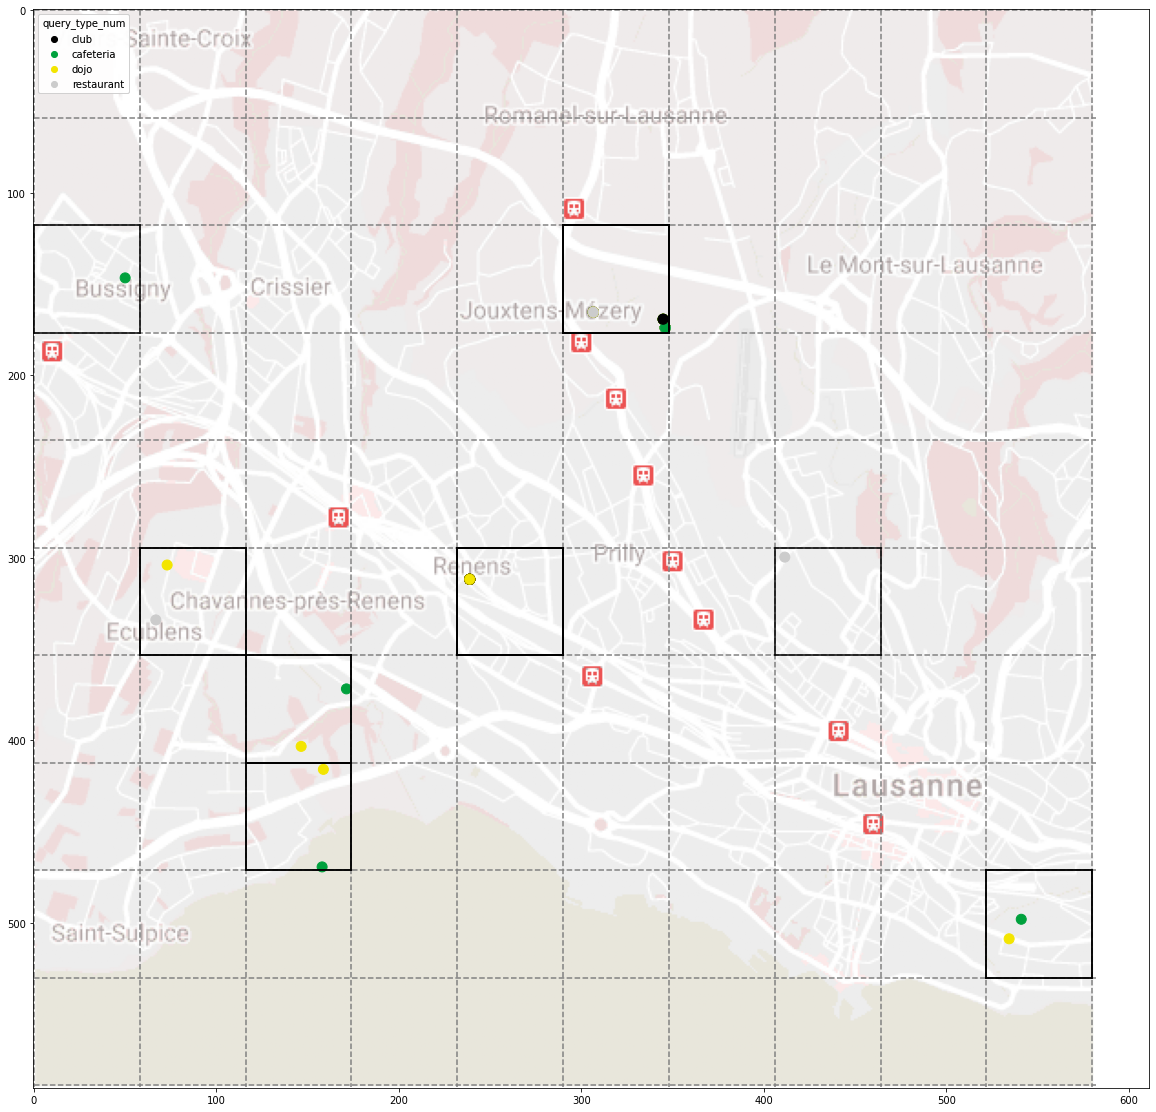

In [13]:
fig, ax = make_map()
#example, plot all queries of user with this ip with color indicating what he searched for
df = queries.loc[queries['ip_address'] == "34.101.177.245"]
ax = plot_query(ax, df, color = 'query_type_num')


# Assumptions and Adversary Model

In [15]:
'''
We first note that the adversary is the service provider, i.e. the people behind the application who have access
to their server, incoming and outgoing traffic to their server. 

They have access to pois.csv: a database showing what locations correspond to what type of building it is. 
Since they have access to the incoming traffic to their server, they also have access to all the queries the 
users make, initially identical to the provided queries.csv (with an implemented defense of user
the incoming queries of the protected users will change)

We list a number of assumptions on the capabilities of the adversary and the client:

- The client, that has no access to the application code, is unable to change the query message style
    i.e. the query still has to have a specific location in latitude, longitude that the client has to provide
    and a single query has to have a single type of poi the client is asking for.
    The timestamp is inherently provided to the server, when the server receives the request, an internal function 
    in the server notes the current time of the received query, thus the client is unable to modify the timestamp
    of the request he is making at the moment of his query request
- Nevertheless, the client is able to modify his current location, before providing inputting it into the query
- Thus he is also able to make a preemtive query for the future by providing his future location, modifying in a
  sense the query timestamp

- The client is unable to query for all types of pois and filter them out to get the one he actually wants if he does
    not have the signature containing subscriptions for all types of pois. for example, user Bob, having paid for
    pois of type (restaurant, bars, B&B) to search for restaurants could try to obfiscate his current interest for
    restaurants by querying for (restaurants, bars, B&B) and then filtering out pois of type bars and B&B, but 
    could not query for (restaurants, bars, B&B, gyms, clubs, ...) since he does not have the required credentials for 
    gyms and clubs and thus the server would see his valid requests of only (restaurant, bars, B&B)
    
    In order to completely obfiscate the current interest of the user, the API would need to be changed by the service
    provider, where the signature of a users' subscriptions be tested locally in the app and there would be a second layer
    signature between the local client application and the server to detect if the query was infact produced by a 
    valid client app
    
- The adversary is a semi-honest (or honest but curious) identity, that has no prior knowledge to any of the users. 
- The adversary is a human or a machine supervised by a human with general understanding of society behaviour. I.e. 
    People usually eat 3 times per day (morning, noon, evening) and most often sleep in 
    their own homes during night time. People work from monday till friday, don't go to 
    random places with no motive, etc.
    
    
- As mentioned he has access to pois.csv and the incoming queries
- He does not have access to the traffic between the user and the local application (i.e. he only sees traffic that
    reaches the server)
- Even though the adversary most surely has access to external search tools that could help him learn more about the 
    user (for example, using homegate, anibis or other real estate sites, by knowing where a user lives, could 
    try to infer the approximate rent price and the users' salary, since the two are closely correlated or if the 
    club the user visited was a gay club would suggest the users' sexuality) we decide to 
    limit this capability in order to force the attack to be concentrated on the provided csv files, but nevertheless,
    we keep in mind this limitation is purely for the purpose of the project and in the real case scenario the adversary 
    could infact use external sources to infer much more data from the location of the users' work location, users' 
    home address or the type of locations he is visiting.


- The main focus of the adversary is a privacy attack with which the adversary could infer some private data about 
    the user from the users' queries.
- We will show a standart two step attack, where the first phase is a shallow, wide spread attack to infer
    little information (where the users live) from multiple users at the same time, while the second phase attack
    involves selecting a single target touched in the first phase and try to learn as much as possible about the 
    particular user (where he lives, works and his interests)



'''
print('')

# PART 2.1 Wide spread: trying to find where users live

In [16]:
#filter the full_queries where the location they searched from is an appartment block
blocks = full_queries.loc[full_queries['poi_type'] == "appartment_block"]
print(len(set(blocks['ip_address'].values)))
blocks

99


ip_address        lat       lon   timestamp poi_type_query  \
1197   60.109.165.215  46.533022  6.585648   19.324706            gym   
1198   60.109.165.215  46.533022  6.585648   19.324706            bar   
1199   60.109.165.215  46.533022  6.585648   44.458384           club   
1200   60.109.165.215  46.533022  6.585648   44.458384     restaurant   
1201   60.109.165.215  46.533022  6.585648   65.454704           club   
...               ...        ...       ...         ...            ...   
20424   88.32.125.209  46.562818  6.635771  426.095600           club   
20425   88.32.125.209  46.562818  6.635771  426.095600    supermarket   
20426   88.32.125.209  46.562818  6.635771  450.004837     restaurant   
20427   88.32.125.209  46.562818  6.635771  450.004837           dojo   
20428   88.32.125.209  46.562818  6.635771  465.764773           dojo   

       time_of_day  day_of_week  query_type_num          poi_type  \
1197     19.324706          1.0               7  appartment_block   
1198     19.324706          1.0               2  appartment_block   
1199     20.458384          2.0               6  appartment_block   
1200     20.458384          2.0               8  appartment_block   
1201     17.454704          3.0               6  appartment_block   
...            ...          ...             ...               ...   
20424    18.095600          4.0               6  appartment_block   
20425    18.095600          4.0               1  appartment_block   
20426    18.004837          5.0               8  appartment_block   
20427    18.004837          5.0              10  appartment_block   
20428     9.764773          6.0              10  appartment_block   

       poi_type_num           x           y  
1197             11  206.756055  311.147039  
1198             11  206.756055  311.147039  
1199             11  206.756055  311.147039  
1200             11  206.756055  311.147039  
1201             11  206.756055  311.147039  
...             ...         ...         ...  
20424            11  497.470311   60.434311  
20425            11  497.470311   60.434311  
20426            11  497.470311   60.434311  
20427            11  497.470311   60.434311  
20428            11  497.470311   60.434311  

[3465 rows x 12 columns]

In [17]:
#there is also a type 'villa' where people might live
villas = full_queries.loc[full_queries['poi_type'] == "villa"]
print(len(set(villas['ip_address'].values)))
villas

101


ip_address        lat       lon   timestamp poi_type_query  \
150    34.101.177.245  46.550342  6.602852   18.024657     restaurant   
151    34.101.177.245  46.550342  6.602852   18.024657      cafeteria   
152    34.101.177.245  46.550342  6.602852   40.597763           dojo   
153    34.101.177.245  46.550342  6.602852   40.597763     restaurant   
154    34.101.177.245  46.550342  6.602852   66.239295           dojo   
...               ...        ...       ...         ...            ...   
20387    13.144.1.235  46.551461  6.583340  426.364886    supermarket   
20388    13.144.1.235  46.551461  6.583340  426.364886            gym   
20389    13.144.1.235  46.551461  6.583340  449.551076    supermarket   
20390    13.144.1.235  46.551461  6.583340  449.551076      cafeteria   
20391    13.144.1.235  46.551461  6.583340  464.471138      cafeteria   

       time_of_day  day_of_week  query_type_num poi_type  poi_type_num  \
150      18.024657          1.0               8    villa             0   
151      18.024657          1.0               3    villa             0   
152      16.597763          2.0              10    villa             0   
153      16.597763          2.0               8    villa             0   
154      18.239295          3.0              10    villa             0   
...            ...          ...             ...      ...           ...   
20387    18.364886          4.0               1    villa             0   
20388    18.364886          4.0               7    villa             0   
20389    17.551076          5.0               1    villa             0   
20390    17.551076          5.0               3    villa             0   
20391     8.471138          6.0               3    villa             0   

                x           y  
150    306.544490  165.404565  
151    306.544490  165.404565  
152    306.544490  165.404565  
153    306.544490  165.404565  
154    306.544490  165.404565  
...           ...         ...  
20387  193.372549  155.990904  
20388  193.372549  155.990904  
20389  193.372549  155.990904  
20390  193.372549  155.990904  
20391  193.372549  155.990904  

[3535 rows x 12 columns]

In [18]:
#with nunique we can see how many unique values there are per column for each ip_adress
counts = blocks.groupby('ip_address').nunique()
print((counts['lat'] == 1).all(), (counts['lon'] == 1).all())
counts
#fortunately for us, there is always a unique lat and lon for every query from an appartment block
#thus we can assume this is the main domicile of the 99/200 users 

True True


ip_address  lat  lon  timestamp  poi_type_query  time_of_day  \
ip_address                                                                      
0.98.248.97               1    1    1         20               4           20   
10.229.150.53             1    1    1         20               4           20   
104.149.206.168           1    1    1         20               4           20   
105.148.239.144           1    1    1         20               4           20   
106.44.169.163            1    1    1         20               4           20   
...                     ...  ...  ...        ...             ...          ...   
90.18.152.161             1    1    1         20               4           20   
90.62.189.218             1    1    1         20               4           20   
94.220.204.193            1    1    1         20               4           20   
94.223.68.192             1    1    1         20               4           20   
95.146.245.203            1    1    1         20               4           20   

                 day_of_week  query_type_num  poi_type  poi_type_num  x  y  
ip_address                                                                  
0.98.248.97                7               4         1             1  1  1  
10.229.150.53              7               4         1             1  1  1  
104.149.206.168            7               4         1             1  1  1  
105.148.239.144            7               4         1             1  1  1  
106.44.169.163             7               4         1             1  1  1  
...                      ...             ...       ...           ... .. ..  
90.18.152.161              7               4         1             1  1  1  
90.62.189.218              7               4         1             1  1  1  
94.220.204.193             7               4         1             1  1  1  
94.223.68.192              7               4         1             1  1  1  
95.146.245.203             7               4         1             1  1  1  

[99 rows x 12 columns]

In [19]:
#same for 'villas' 
counts2 = villas.groupby('ip_address').nunique()
print((counts2['lat'] == 1).all(), (counts2['lon'] == 1).all())
counts2
#we have found where the users live in all 200 cases

True True


ip_address  lat  lon  timestamp  poi_type_query  time_of_day  \
ip_address                                                                      
100.255.65.73             1    1    1         20               4           20   
101.193.212.180           1    1    1         20               4           20   
103.107.27.105            1    1    1         20               4           20   
103.75.228.13             1    1    1         20               4           20   
11.105.81.179             1    1    1         20               4           20   
...                     ...  ...  ...        ...             ...          ...   
9.222.136.149             1    1    1         20               4           20   
91.60.233.179             1    1    1         20               4           20   
92.140.193.171            1    1    1         20               4           20   
96.128.153.246            1    1    1         20               4           20   
97.138.146.97             1    1    1         20               4           20   

                 day_of_week  query_type_num  poi_type  poi_type_num  x  y  
ip_address                                                                  
100.255.65.73              7               4         1             1  1  1  
101.193.212.180            7               4         1             1  1  1  
103.107.27.105             7               4         1             1  1  1  
103.75.228.13              7               4         1             1  1  1  
11.105.81.179              7               4         1             1  1  1  
...                      ...             ...       ...           ... .. ..  
9.222.136.149              7               4         1             1  1  1  
91.60.233.179              7               4         1             1  1  1  
92.140.193.171             7               4         1             1  1  1  
96.128.153.246             7               4         1             1  1  1  
97.138.146.97              7               4         1             1  1  1  

[101 rows x 12 columns]

{'appartment_block': 11}


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


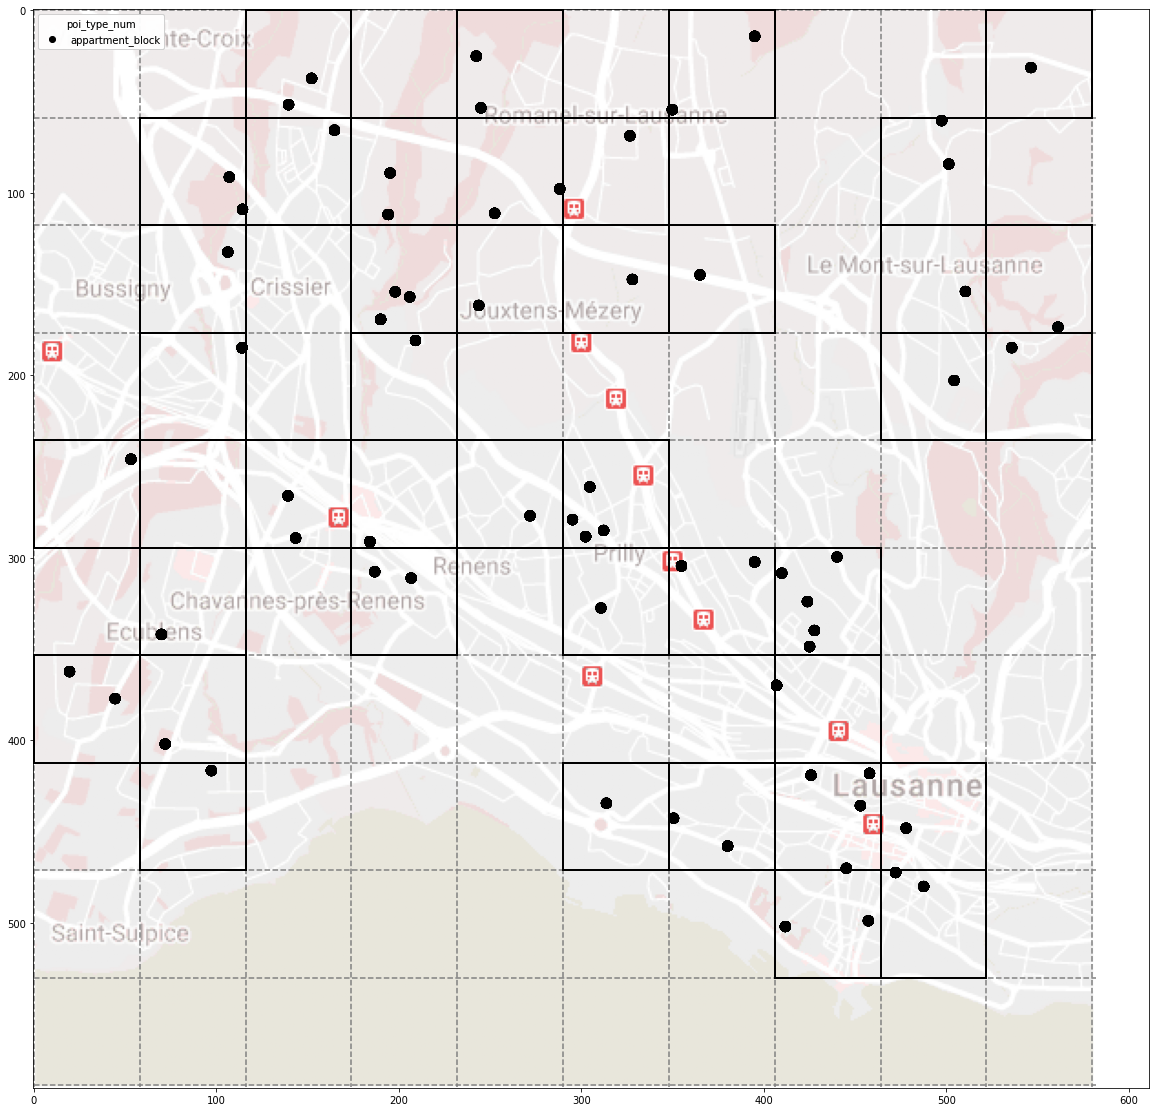

In [20]:
fig, ax = make_map()
#plot all queries made from appartment blocks
ax = plot_query(ax, blocks)


{'villa': 2, 'appartment_block': 5}


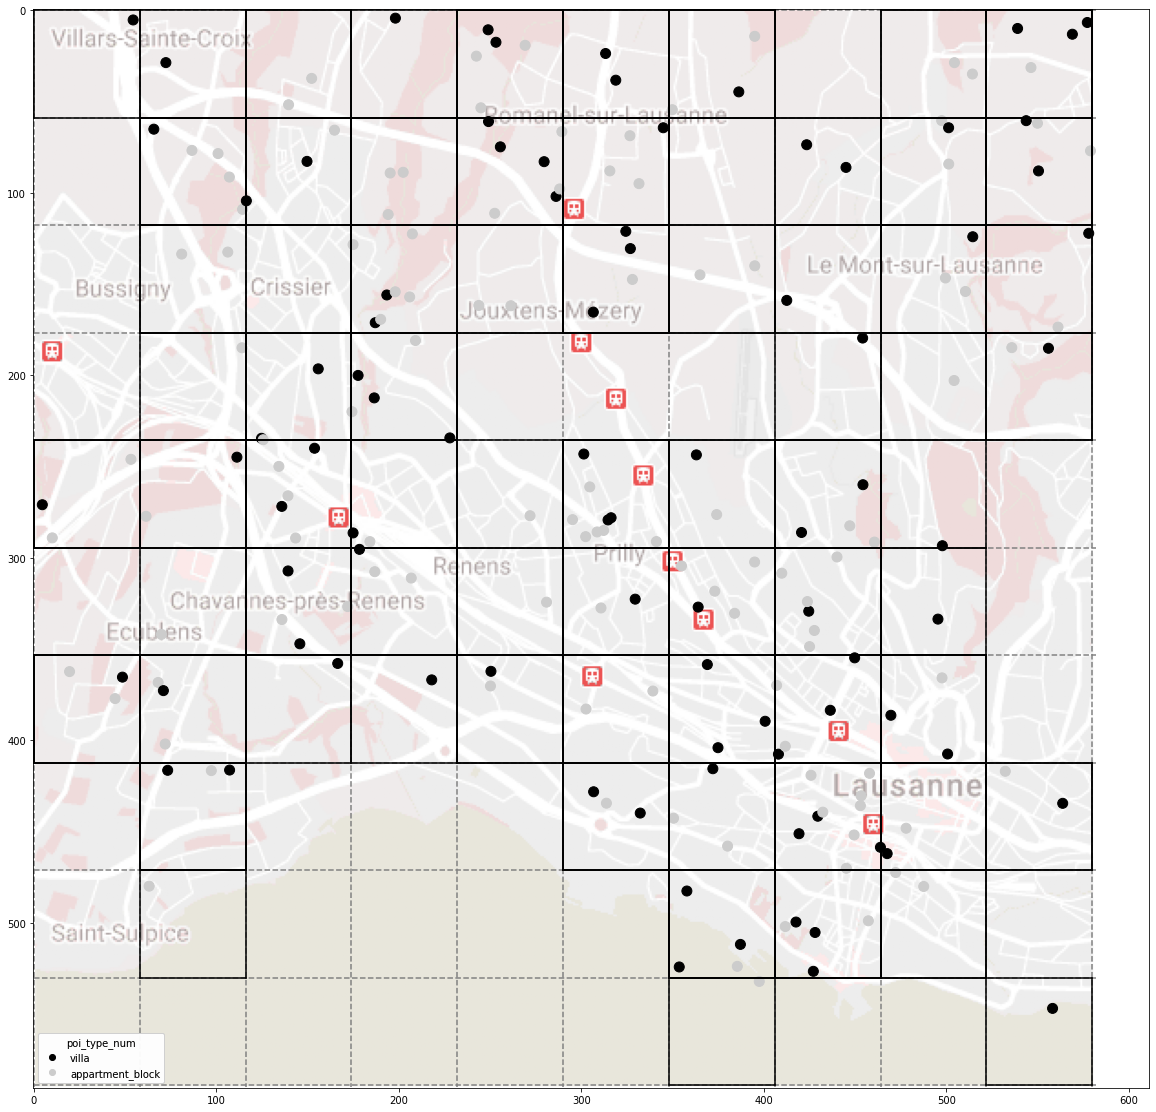

In [49]:
fig, ax = make_map()
#plot all homes in dataset pois
ax = plot_query(ax, pois.loc[pois['poi_type'].isin(['villa', 'appartment_block'])])

found 101 unique targets in 0.338725 seconds
found 99 unique targets in 0.359644 seconds
Empty DataFrame
Columns: [ip_address, lat, lon, timestamp, poi_type_query, time_of_day, day_of_week, query_type_num, poi_type, poi_type_num, x, y]
Index: []
{'villa': 0, 'appartment_block': 11}
200


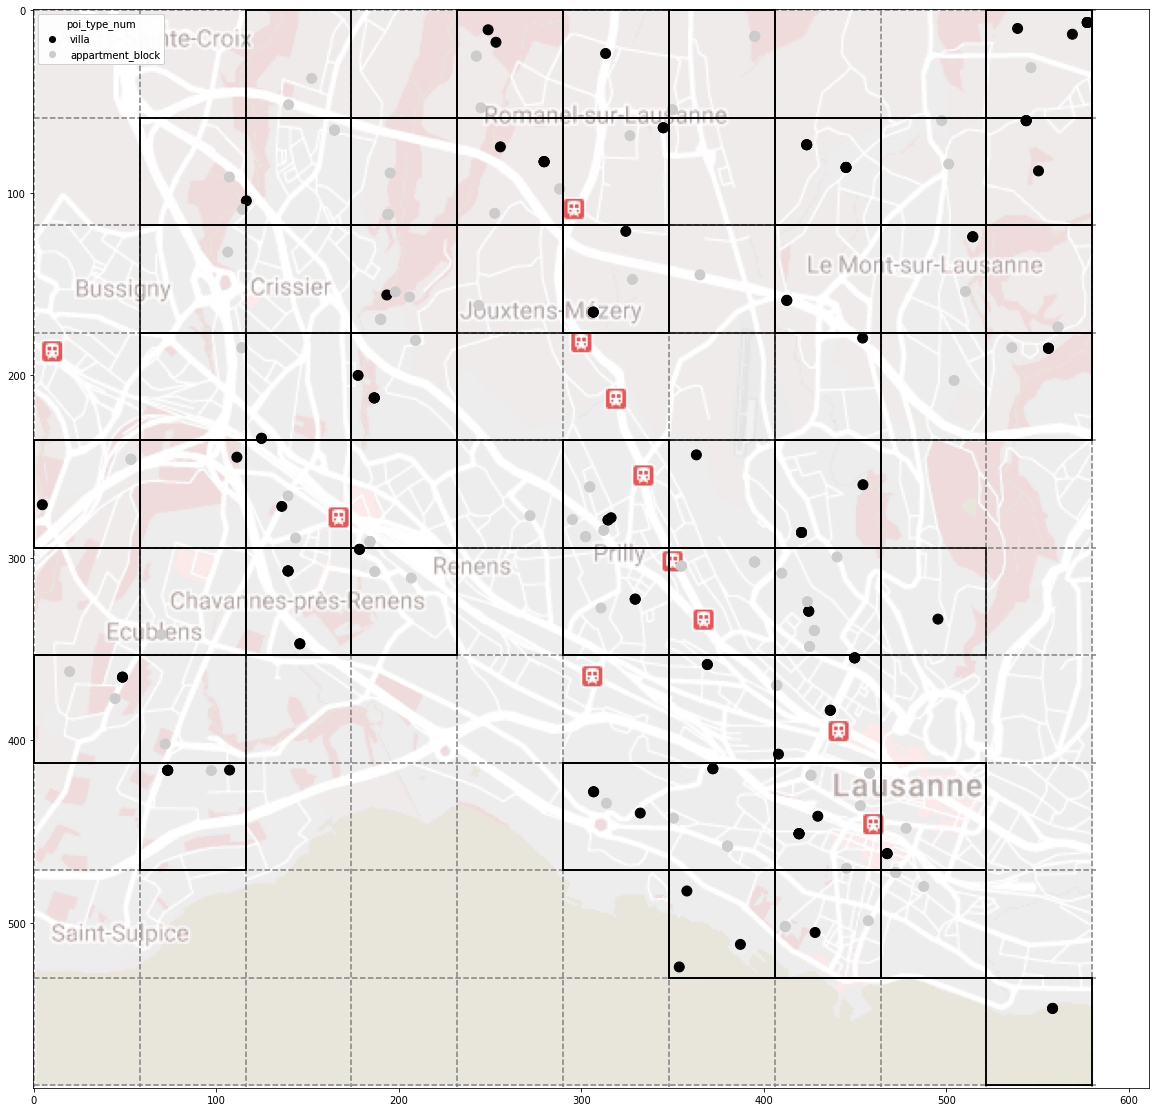

In [24]:
#to show the ease of doing this, put everything in 1 single function and time it

#for every ip (user) for given poi_type from where they searched from (for example home == 'appartment_block)
#checks if the position is the unique location and if it is, adds to a df ip lat, lon poi_type
#and returns the df 
import time
def shotgun_attack(csv, poi_type):
    t0 = time.time()
    blocks = csv.loc[csv['poi_type'] == poi_type]
    counts = blocks.groupby('ip_address')['poi_type'].nunique()
    hacked = {}
    for idx, row in blocks.iterrows():
        if row['ip_address'] not in hacked:
            if counts[row['ip_address']] == 1:
                hacked[row['ip_address']] = row
    
    t1 = time.time()
    print('found {:} unique targets in {:02f} seconds'.format(len(counts), t1-t0))
    return pd.DataFrame.from_dict(hacked, orient='index')
        

targets = shotgun_attack(full_queries, 'villa')
targets2 = shotgun_attack(full_queries, 'appartment_block')
#check if ips are intersecting by mistake
intersect = pd.merge(targets.loc[targets['ip_address']], targets2.loc[targets2['ip_address']], how='inner')
print(intersect)
targets = pd.merge(targets, targets2, how= 'outer')
fig, ax = make_map()
ax = plot_query(ax, targets, color = 'poi_type_num')
print(len(targets))

In [29]:
#all user home locations and home type
targets[['ip_address', 'lat', 'lon', 'poi_type']]

ip_address        lat       lon          poi_type
0     34.101.177.245  46.550342  6.602852             villa
1      189.222.3.241  46.550342  6.602852             villa
2    244.190.169.115  46.547989  6.645860             villa
3      166.3.233.225  46.547989  6.645860             villa
4      103.75.228.13  46.547989  6.645860             villa
..               ...        ...       ...               ...
195    89.234.179.60  46.550779  6.592034  appartment_block
196     19.24.38.167  46.556781  6.593532  appartment_block
197   95.146.245.203  46.559405  6.583655  appartment_block
198    138.53.90.242  46.529353  6.562041  appartment_block
199    88.32.125.209  46.562818  6.635771  appartment_block

[200 rows x 4 columns]

found 69 unique targets in 0.229424 seconds
found 55 unique targets in 0.162388 seconds
Empty DataFrame
Columns: [ip_address, lat, lon, timestamp, poi_type_query, time_of_day, day_of_week, query_type_num, poi_type, poi_type_num, x, y]
Index: []
found 76 unique targets in 0.216351 seconds
{'company': 5, 'office': 4, 'laboratory': 9}
200


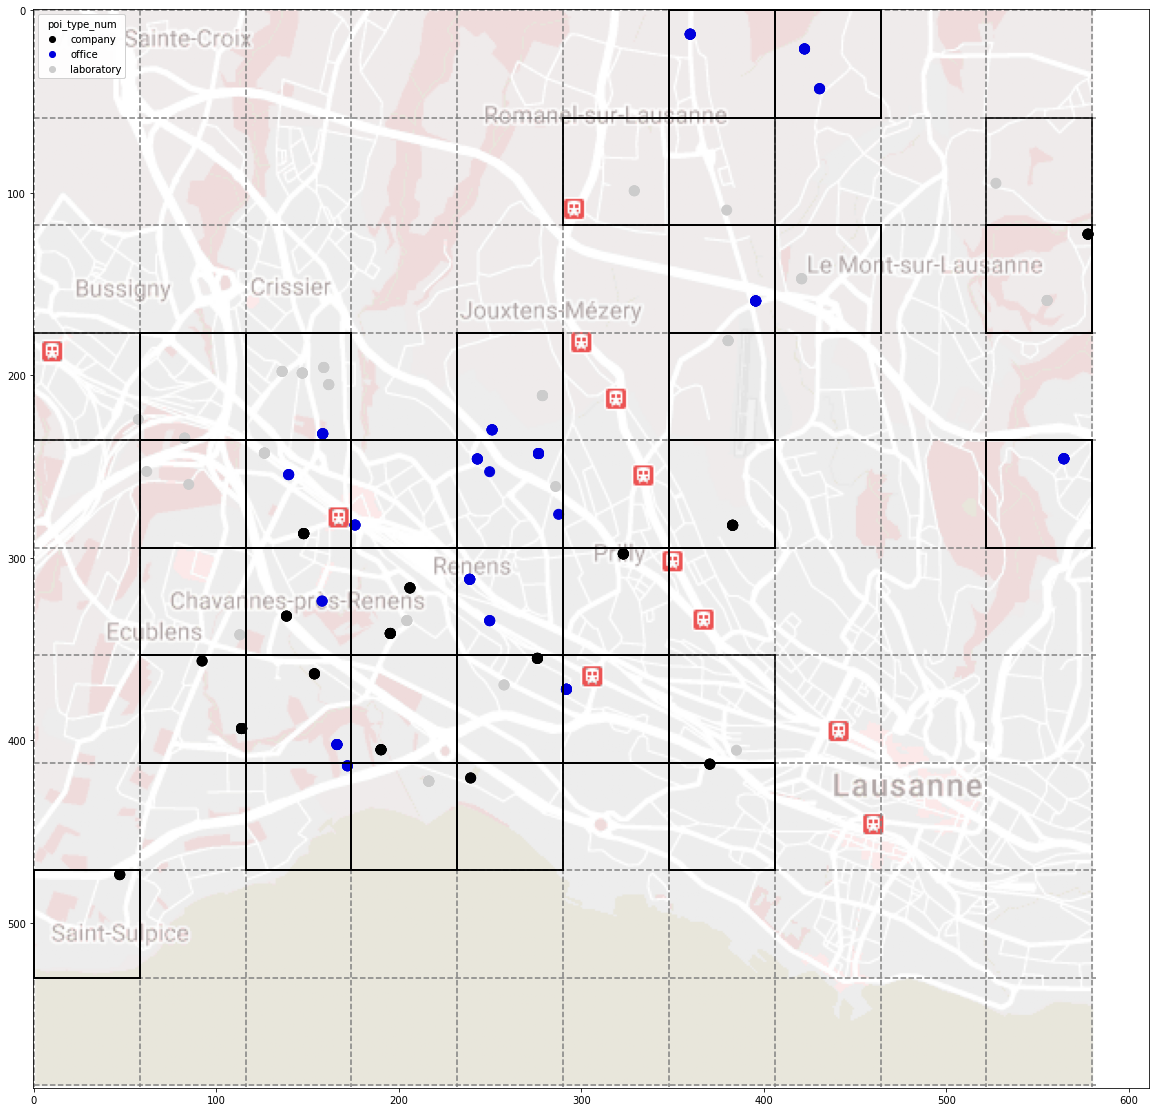

In [30]:
#same for work
'office' ,'laboratory', 'company'
targets = shotgun_attack(full_queries, 'office')
targets2 = shotgun_attack(full_queries, 'laboratory')
intersect = pd.merge(targets.loc[targets['ip_address']], targets2.loc[targets2['ip_address']], how='inner')
print(intersect)
targets = pd.merge(targets, targets2, how= 'outer')
targets3 = shotgun_attack(full_queries, 'company')

targets = pd.merge(targets, targets3, how= 'outer')
#check if ips are intersecting by mistake

fig, ax = make_map()
ax = plot_query(ax, targets, color = 'poi_type_num')
print(len(targets))

In [31]:
#all user work locations and work type
targets[['ip_address', 'lat', 'lon', 'poi_type']]

ip_address        lat       lon poi_type
0     159.118.124.69  46.529415  6.583668   office
1      232.230.163.5  46.529415  6.583668   office
2    107.201.148.122  46.529415  6.583668   office
3     146.148.99.165  46.529415  6.583668   office
4    138.154.139.194  46.529415  6.583668   office
..               ...        ...       ...      ...
195     71.146.193.2  46.539950  6.593055  company
196   245.245.186.65  46.536478  6.580334  company
197    24.103.222.44  46.536478  6.580334  company
198  205.217.178.129  46.536478  6.580334  company
199     147.98.35.57  46.537174  6.599574  company

[200 rows x 4 columns]

# Phase 2: selecting 1 target and learning as much as possible

{'appartment_block': 11}


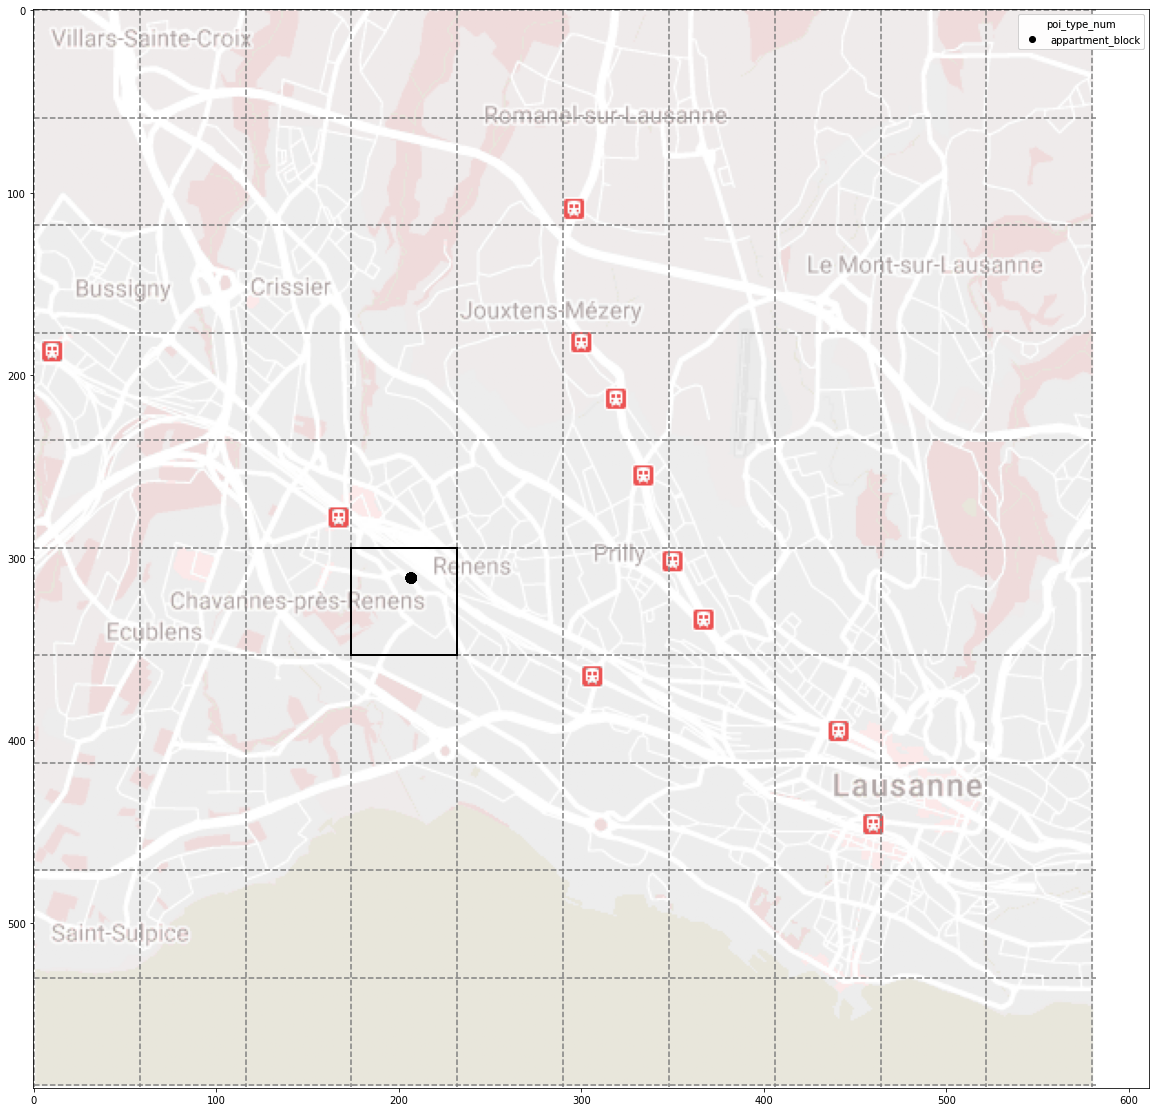

In [32]:
fig, ax = make_map()

df = blocks.loc[blocks['ip_address'] == '60.109.165.215']
#target with ip = 60.109.165.215, using df with all queries done from home
ax = plot_query(ax, df)
#this ip lives here

In [33]:
print(df.groupby('poi_type_query')['day_of_week'].nunique())
df
#very interesting person! lives in an appartment_block, searches for bars/clubs every day. 
# Searches mostly in the evening on workdays and morning on weekends

poi_type_query
bar           7
club          5
gym           5
restaurant    5
Name: day_of_week, dtype: int64


ip_address        lat       lon   timestamp poi_type_query  \
1197  60.109.165.215  46.533022  6.585648   19.324706            gym   
1198  60.109.165.215  46.533022  6.585648   19.324706            bar   
1199  60.109.165.215  46.533022  6.585648   44.458384           club   
1200  60.109.165.215  46.533022  6.585648   44.458384     restaurant   
1201  60.109.165.215  46.533022  6.585648   65.454704           club   
1202  60.109.165.215  46.533022  6.585648   65.454704     restaurant   
1203  60.109.165.215  46.533022  6.585648   89.182454     restaurant   
1204  60.109.165.215  46.533022  6.585648   89.182454            bar   
1205  60.109.165.215  46.533022  6.585648  117.214349            bar   
1206  60.109.165.215  46.533022  6.585648  117.214349            gym   
1207  60.109.165.215  46.533022  6.585648  128.747329            gym   
1208  60.109.165.215  46.533022  6.585648  153.464024            bar   
1209  60.109.165.215  46.533022  6.585648  187.936889           club   
1210  60.109.165.215  46.533022  6.585648  187.936889            bar   
1211  60.109.165.215  46.533022  6.585648  211.507037     restaurant   
1212  60.109.165.215  46.533022  6.585648  211.507037           club   
1213  60.109.165.215  46.533022  6.585648  234.774176            gym   
1214  60.109.165.215  46.533022  6.585648  234.774176            bar   
1215  60.109.165.215  46.533022  6.585648  259.781458            gym   
1216  60.109.165.215  46.533022  6.585648  259.781458           club   
1217  60.109.165.215  46.533022  6.585648  282.938048     restaurant   
1218  60.109.165.215  46.533022  6.585648  282.938048            gym   
1219  60.109.165.215  46.533022  6.585648  296.321006            bar   
1220  60.109.165.215  46.533022  6.585648  321.357289            bar   
1221  60.109.165.215  46.533022  6.585648  356.186048            bar   
1222  60.109.165.215  46.533022  6.585648  356.186048     restaurant   
1223  60.109.165.215  46.533022  6.585648  380.580287     restaurant   
1224  60.109.165.215  46.533022  6.585648  380.580287            bar   
1225  60.109.165.215  46.533022  6.585648  402.846513     restaurant   
1226  60.109.165.215  46.533022  6.585648  402.846513            bar   
1227  60.109.165.215  46.533022  6.585648  427.881572            gym   
1228  60.109.165.215  46.533022  6.585648  427.881572     restaurant   
1229  60.109.165.215  46.533022  6.585648  449.817011            gym   
1230  60.109.165.215  46.533022  6.585648  449.817011           club   
1231  60.109.165.215  46.533022  6.585648  464.504041            gym   

      time_of_day  day_of_week  query_type_num          poi_type  \
1197    19.324706          1.0               7  appartment_block   
1198    19.324706          1.0               2  appartment_block   
1199    20.458384          2.0               6  appartment_block   
1200    20.458384          2.0               8  appartment_block   
1201    17.454704          3.0               6  appartment_block   
1202    17.454704          3.0               8  appartment_block   
1203    17.182454          4.0               8  appartment_block   
1204    17.182454          4.0               2  appartment_block   
1205    21.214349          5.0               2  appartment_block   
1206    21.214349          5.0               7  appartment_block   
1207     8.747329          6.0               7  appartment_block   
1208     9.464024          0.0               2  appartment_block   
1209    19.936889          1.0               6  appartment_block   
1210    19.936889          1.0               2  appartment_block   
1211    19.507037          2.0               8  appartment_block   
1212    19.507037          2.0               6  appartment_block   
1213    18.774176          3.0               7  appartment_block   
1214    18.774176          3.0               2  appartment_block   
1215    19.781458          4.0               7  appartment_block   
1216    19.781458          4.0               6  appartmen

{'bar': 2, 'company': 5, 'gym': 7, 'restaurant': 8, 'appartment_block': 11}


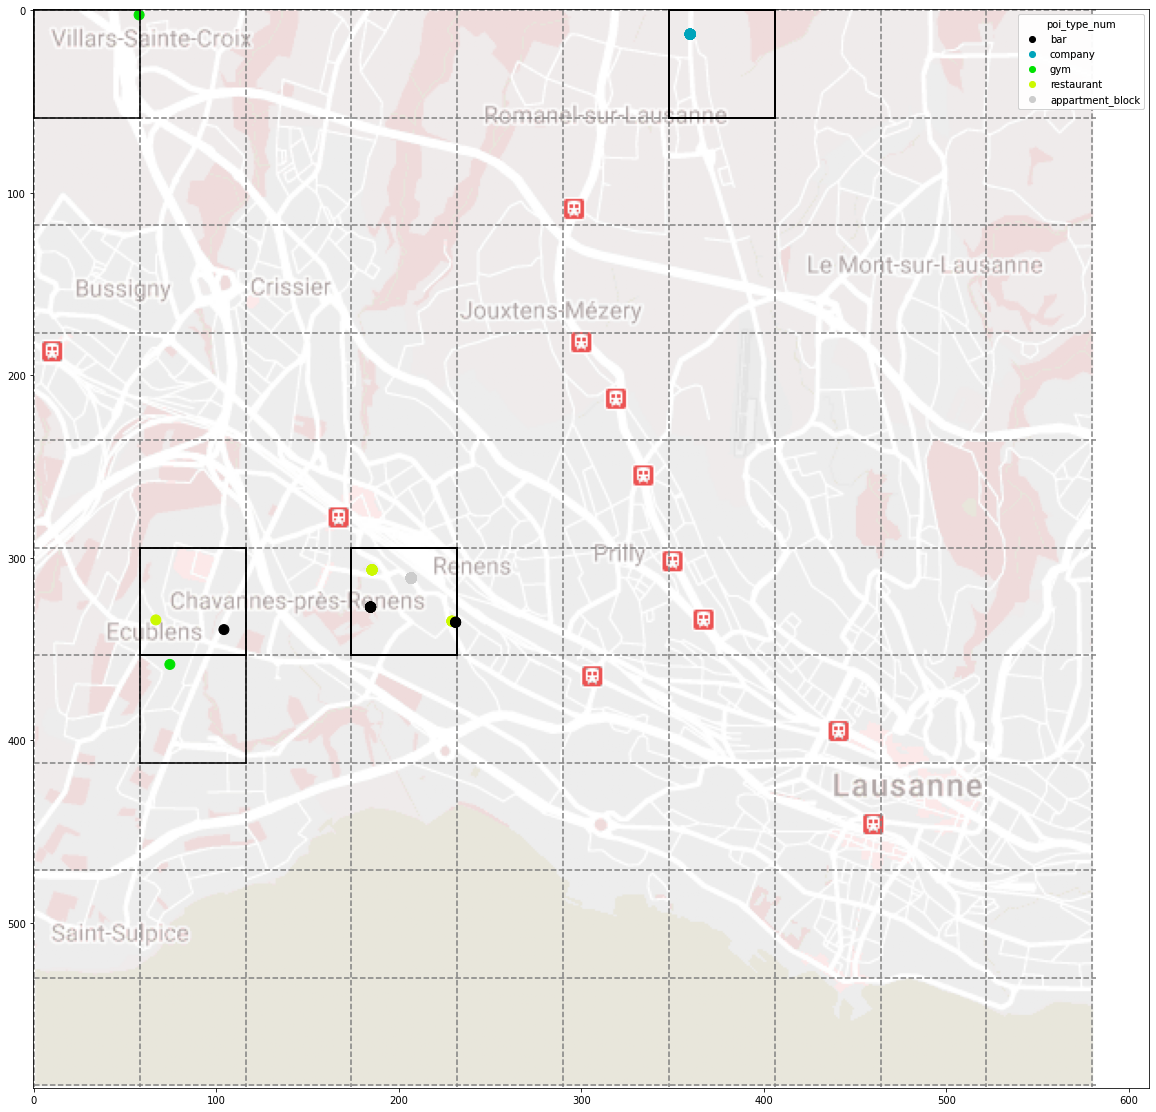

In [34]:
inter_person = full_queries.loc[full_queries['ip_address'] == '60.109.165.215']
#where was he
fig, ax = make_map()
ax = plot_query(ax, inter_person, color='poi_type_num')

{'bar': 2, 'cafeteria': 3, 'club': 6, 'gym': 7, 'restaurant': 8}


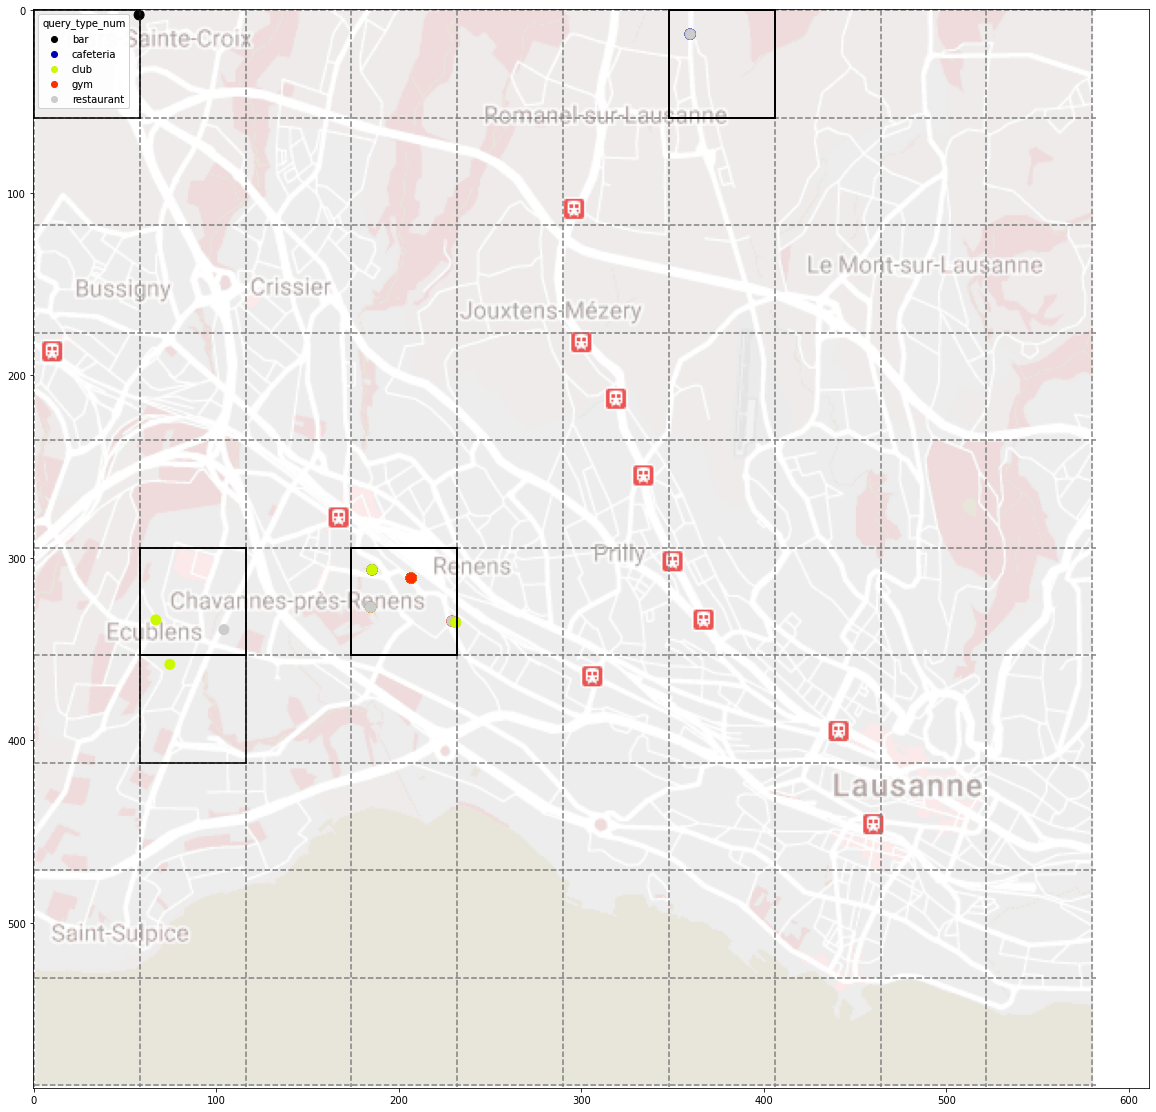

In [36]:
fig, ax = make_map()
#what he searched for
ax = plot_query(ax, inter_person, color='query_type_num')

Using both graphs, we can see that, the person lives next to renens train station. Works in a company in Remanel-sur-Lausanne, where he usually goes to eat lunch in a nearby restaurant/cafeteria. 

The person searched for a gym 5 times around 21h from a restaurant or home and the 6th time on a saturday morning went to the proposed gym in Sainte-Croix (quite far from where he lives)

Around two weeks later he changed gyms to a closer one at Ecublens

In [37]:
inter_person.loc[inter_person['poi_type']=='gym']

ip_address        lat       lon   timestamp poi_type_query  \
1287  60.109.165.215  46.527398  6.562839  128.747329           club   
1333  60.109.165.215  46.569704  6.559932  464.504041            bar   

      time_of_day  day_of_week  query_type_num poi_type  poi_type_num  \
1287     8.747329          6.0               6      gym             7   
1333     8.504041          6.0               2      gym             7   

              x           y  
1287  74.467970  358.468011  
1333  57.607159    2.491720

In [38]:
g = inter_person.loc[inter_person['poi_type_query']=='gym']
g.loc[g['timestamp'] < 129]

ip_address        lat       lon   timestamp poi_type_query  \
1197  60.109.165.215  46.533022  6.585648   19.324706            gym   
1206  60.109.165.215  46.533022  6.585648  117.214349            gym   
1207  60.109.165.215  46.533022  6.585648  128.747329            gym   
1235  60.109.165.215  46.531132  6.581805  116.246192            gym   
1259  60.109.165.215  46.533561  6.581944   68.795142            gym   
1262  60.109.165.215  46.533561  6.581944   92.138208            gym   

      time_of_day  day_of_week  query_type_num          poi_type  \
1197    19.324706          1.0               7  appartment_block   
1206    21.214349          5.0               7  appartment_block   
1207     8.747329          6.0               7  appartment_block   
1235    20.246192          5.0               7               bar   
1259    20.795142          3.0               7        restaurant   
1262    20.138208          4.0               7        restaurant   

      poi_type_num           x           y  
1197            11  206.756055  311.147039  
1206            11  206.756055  311.147039  
1207            11  206.756055  311.147039  
1235             2  184.468839  327.046339  
1259             8  185.273577  306.609467  
1262             8  185.273577  306.609467

In [39]:
g = inter_person.loc[inter_person['poi_type_query']=='gym']
g.loc[g['timestamp'] > 129]

ip_address        lat       lon   timestamp poi_type_query  \
1213  60.109.165.215  46.533022  6.585648  234.774176            gym   
1215  60.109.165.215  46.533022  6.585648  259.781458            gym   
1218  60.109.165.215  46.533022  6.585648  282.938048            gym   
1227  60.109.165.215  46.533022  6.585648  427.881572            gym   
1229  60.109.165.215  46.533022  6.585648  449.817011            gym   
1231  60.109.165.215  46.533022  6.585648  464.504041            gym   
1241  60.109.165.215  46.531132  6.581805  296.321006            gym   
1289  60.109.165.215  46.530215  6.589490  211.226449            gym   
1290  60.109.165.215  46.530215  6.589490  427.675338            gym   
1316  60.109.165.215  46.530140  6.589840  321.357289            gym   

      time_of_day  day_of_week  query_type_num          poi_type  \
1213    18.774176          3.0               7  appartment_block   
1215    19.781458          4.0               7  appartment_block   
1218    18.938048          5.0               7  appartment_block   
1227    19.881572          4.0               7  appartment_block   
1229    17.817011          5.0               7  appartment_block   
1231     8.504041          6.0               7  appartment_block   
1241     8.321006          6.0               7               bar   
1289    19.226449          2.0               7        restaurant   
1290    19.675338          4.0               7        restaurant   
1316     9.357289          0.0               7               bar   

      poi_type_num           x           y  
1213            11  206.756055  311.147039  
1215            11  206.756055  311.147039  
1218            11  206.756055  311.147039  
1227            11  206.756055  311.147039  
1229            11  206.756055  311.147039  
1231            11  206.756055  311.147039  
1241             2  184.468839  327.046339  
1289             8  229.040600  334.766100  
1290             8  229.040600  334.766100  
1316             2  231.070499  335.389884

The person sometimes goes out to bars from where he searches for other bars/clubs or restaurants to do some "bar hopping"



In [40]:
inter_person.loc[inter_person['poi_type'] == 'bar']

ip_address        lat       lon   timestamp poi_type_query  \
1232  60.109.165.215  46.531132  6.581805   20.590331            bar   
1233  60.109.165.215  46.531132  6.581805   20.590331           club   
1234  60.109.165.215  46.531132  6.581805  116.246192     restaurant   
1235  60.109.165.215  46.531132  6.581805  116.246192            gym   
1236  60.109.165.215  46.531132  6.581805  153.464024     restaurant   
1237  60.109.165.215  46.531132  6.581805  189.412753     restaurant   
1238  60.109.165.215  46.531132  6.581805  189.412753           club   
1239  60.109.165.215  46.531132  6.581805  239.029585            bar   
1240  60.109.165.215  46.531132  6.581805  239.029585     restaurant   
1241  60.109.165.215  46.531132  6.581805  296.321006            gym   
1242  60.109.165.215  46.531132  6.581805  404.277668           club   
1243  60.109.165.215  46.531132  6.581805  404.277668     restaurant   
1316  60.109.165.215  46.530140  6.589840  321.357289            gym   
1317  60.109.165.215  46.530140  6.589840  381.355519     restaurant   
1318  60.109.165.215  46.530140  6.589840  381.355519           club   
1335  60.109.165.215  46.529667  6.567947  464.504041     restaurant   

      time_of_day  day_of_week  query_type_num poi_type  poi_type_num  \
1232    20.590331          1.0               2      bar             2   
1233    20.590331          1.0               6      bar             2   
1234    20.246192          5.0               8      bar             2   
1235    20.246192          5.0               7      bar             2   
1236     9.464024          0.0               8      bar             2   
1237    21.412753          1.0               8      bar             2   
1238    21.412753          1.0               6      bar             2   
1239    23.029585          3.0               2      bar             2   
1240    23.029585          3.0               8      bar             2   
1241     8.321006          6.0               7      bar             2   
1242    20.277668          3.0               6      bar             2   
1243    20.277668          3.0               8      bar             2   
1316     9.357289          0.0               7      bar             2   
1317    21.355519          2.0               8      bar             2   
1318    21.355519          2.0               6      bar             2   
1335     8.504041          6.0               8      bar             2   

               x           y  
1232  184.468839  327.046339  
1233  184.468839  327.046339  
1234  184.468839  327.046339  
1235  184.468839  327.046339  
1236  184.468839  327.046339  
1237  184.468839  327.046339  
1238  184.468839  327.046339  
1239  184.468839  327.046339  
1240  184.468839  327.046339  
1241  184.468839  327.046339  
1242  184.468839  327.046339  
1243  184.468839  327.046339  
1316  231.070499  335.389884  
1317  231.070499  335.389884  
1318  231.070499  335.389884  
1335  104.094787  339.371940

# Attack conclusion

In [41]:
'''
as we can see the automatic search is a few lines of code that finishes in less than a second (around 0.3s)
for a dataframe of 20443 lines from 200 users. 

the attacker is able to infer multiple types of information, on a scale from 1 to 5 we decide on the severity of this 
information leakage:
    - 1 what the user searched for 
        severity 1: the poi.csv does not contain pois related to sensitive information (hospitals, specialized 
        clinics, religious buildings) thus the leakage is not too important. Also searching for a location does not
        necessarily mean the user went to the proposed specific place
    - 2 the user searched from his main domicile
        severity 5: knowing where the user lives, reveals a lot of information: address, name, personal mail box address.
        from this information, an external search could find more information on the person on their social media account
        (if public), approximate revenue inferred from the average location rent/home ownership cost.
    - 3 the user searched from his work place
        severity 4: while not as important as domicile address, the work address, depending on the company and size
        could completely reveal the person identity or social group (education, specialisation etc)
        with some additional external searches.
    - 4 the user searched from somewhere other than his work place or domicile
        severity 2: as with 1, the pois are not related to sensitive information. It is a bit higher than 1 though, 
        since this reveals where the user has been. Additional external searches on the locations the user has visited
        could reveal some information on the user, but not too much to pin-point him entirely. 

It is important to note that if used together, these attacks (as seen in our attack) could learn more (sum is more 
than its' parts) where we could learn a general motive of user actions and create a markov chain model on the users'
daily routine to guess the future steps the user will make given his current state
        
The severity is dependent on the poi_type the attack is specifying, while the cost is the same for all attacks
While in fact it should require more effort and cost for the attack the higher the severity is

currently:                                                  should be

severity                                                   severity
^                                                          ^
| 2            |                                           |              |              | 2
|              |                                           |              |              |
| 3            |                                           |              |              | 3
|              |                                           |              |              |
|              |                                           |              |              |
|              |                                           |              |              |
|              |                                           |              |              |
| 4            |                                           |              | 4            |
| 1            |                                           |  1           |              |
---------------|-----> cost of attack                      --------------------------------------> cost



'''

print('')

# DEFENSE


2.898550724637681
17



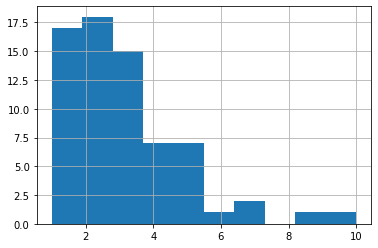

In [42]:
'''
As established by graph, we require high defense for location privacy regarding work and home and medium for other
type of pois. If we establish two different methods to use when we need high or medium, the adversary could quickly
distinguish the two methods and learn something from it, thus we decide to implement one high defense 

'''
#by checking the time, the adversary can assume that you're at home or not (same for work hours)
#thus we also assume given timestamp, the adversary can correctly guess if the user is at home (or at work)
#with v. high probability (for simplicity assume pr = 1)
'''
We will count the number of homes per grid in order to quantify privacy

'''
homes = pois.loc[pois['poi_type'].isin(['villa' ,'appartment_block'])]

nb_homes = homes.groupby('cell_id')['poi_id'].nunique().values
print(np.mean(nb_homes))
plt.grid()
plt.hist(nb_homes)

print(len(nb_homes[nb_homes < 2]))

'''
69/100 cells have homes in them and 17 have only 1 single home in it, which shows a simple defense of
just returning a stationary point (for example the top left corner of the cell) would rarely work since the
adversary would easily re-link it to your house if you make a query between the evening and the morning
'''

'''
The idea behind our privacy defense is: given a surface and a user provided
location, the adversary at best would have a probability p 
of correctly guessing the users' real location, given that the provided location
and real location are in the same surface area
'''

'''
Without the defense, the surface area can be abstracted to a circle of a v. small radius epsilon > 0
thus pr(correctly guess real location | provided location) = 1

as we can see below, providing the top left corner of the grid the user is in, the area is the cell
but the probability to correctly guess varies between 1 and 0.1 depeding on the number of homes in the grid cell 
'''
print('')

[1 1 1 1 1 1 2 2 1 2 1 1 1 2 4 2 1 2 4 1 5 1 1 1 1 5 2 2 1 1 2 1 1 1 1 2]
22


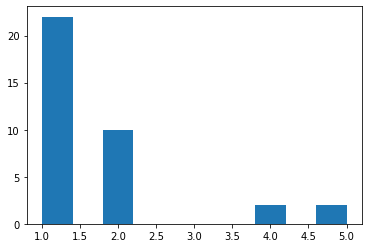

In [43]:
#for work
work = pois.loc[pois['poi_type'].isin(['office' ,'laboratory', 'company'])]

nb_work = work.groupby('cell_id')['poi_id'].nunique().values
print(nb_work)
plt.hist(nb_work)

print(len(nb_work[nb_work < 2]))


Defense: Perturbation <br>
<br>
given user real location as input, we add noise sampled from a laplacian distribution with parameter r <br>

so that given parameter r and the perturbed location <br>
the adversary has probability q < p to correctly guess the real location of the user i.e. <br>

q = pr( y | r, x) < p where x is the perturbed location and y is the adversaries guess
<br>

We note that the user does not have access to the number of homes around him, thus cannot set his noise parameter <br>
as a function of pois around him as in the exercise. In order to a achieve this, the service provider would need to <br>
implement this defense himself instead of the client


<br>

Using this defense, the service provider would not be guaranteed anymore to have our exact location and by proxy our home address, our work location etc. Using the principles of differential privacy, perturbing the noise with a laplacian distribution keeps some utility while increases privacy

In [44]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.stats import laplace 

np.random.seed(1)
#given image coordinates and radius finds all rows in given df that fall inside circle radius
def inside(df, x, y, r):
    return len(df.loc[(df.x - x)**2 + (df.y - y)**2 <= r**2])

#widgetting to find laplacian scale and amplification factor (due to x,y being map coordinates)
#to get how many homes fall in circle radius from every other home 
#and do same with workspace
def fine_tune(scale, amp):
    
    #df = work, homes
    
    #even though laplace is like gaussian distribution spanning from -inf to inf, we can assume a certain
    #cut of the distribution and call it a circle of certitude where 95% of points "fall in"
    #probable radius 
    r = amp*laplace.ppf(0.95, scale = scale)
    print(r, r/amp)
    count_homes = []
    count_work = []
    for idx, row in homes.iterrows():
        count_homes.append(inside(homes, row.x, row.y, r))
    for idx, row in work.iterrows():
        count_work.append(inside(work, row.x, row.y, r))
    print('homes ', max(count_homes), min(count_homes), np.mean(count_homes))
    print('work ', max(count_work), min(count_work), np.mean(count_work))
w = interactive(fine_tune, scale=(0.01,5,0.01), amp = (1,50,1))
output = w.children[-1]
w

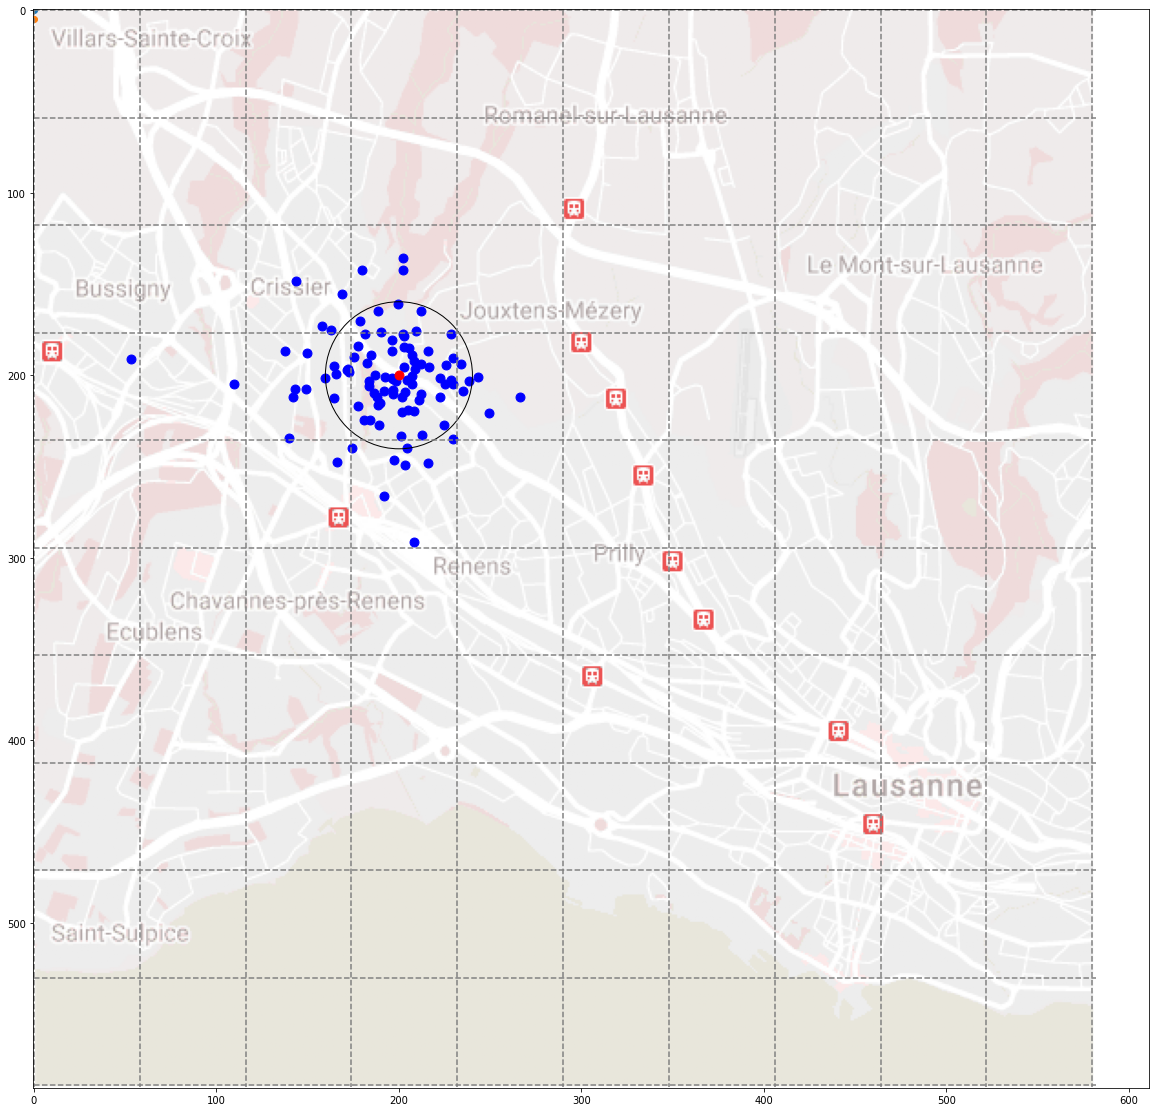

In [45]:
amp = 5
fig, ax = make_map()
#test
ax.scatter(0,0)
ax.scatter(0,5)
#show the size of the amplification factor in top left corner with the two points
#as we can see it more or less is equivalent to the width of a highway.
np.random.seed(1)

for i in range(100):
    xr = amp*np.random.laplace(loc = 0, scale = 3.5)
    yr = amp*np.random.laplace(loc = 0, scale = 3.5)
    ax.scatter(xr+200, yr+200, c = 'blue', s = 80)
ax.scatter(200,200, c = 'red', s = 80)
r = 5*laplace.ppf(0.95, scale = 3.5)
circle = plt.Circle((200, 200), r, color = 'black', fill=False)
ax.add_artist(circle)

With scale = 3.5 and an amplification factor of 5 due to this being image coordinates (see graph above to see what is a 5 pixel step on map) we get that on average there are 5.56 homes in a radius of 95% percent confidence.
<br>
unfortunately some homes are still singular in their radius, but as seen in graph above, increasing more (to have at least 2 homes) would render the app completely unusable
<br>

Since we established that home address is less sensitive than home, we suffice to keep the same parameters to have 3.16 other work places in radius of confidence

3 13 8.342857142857143


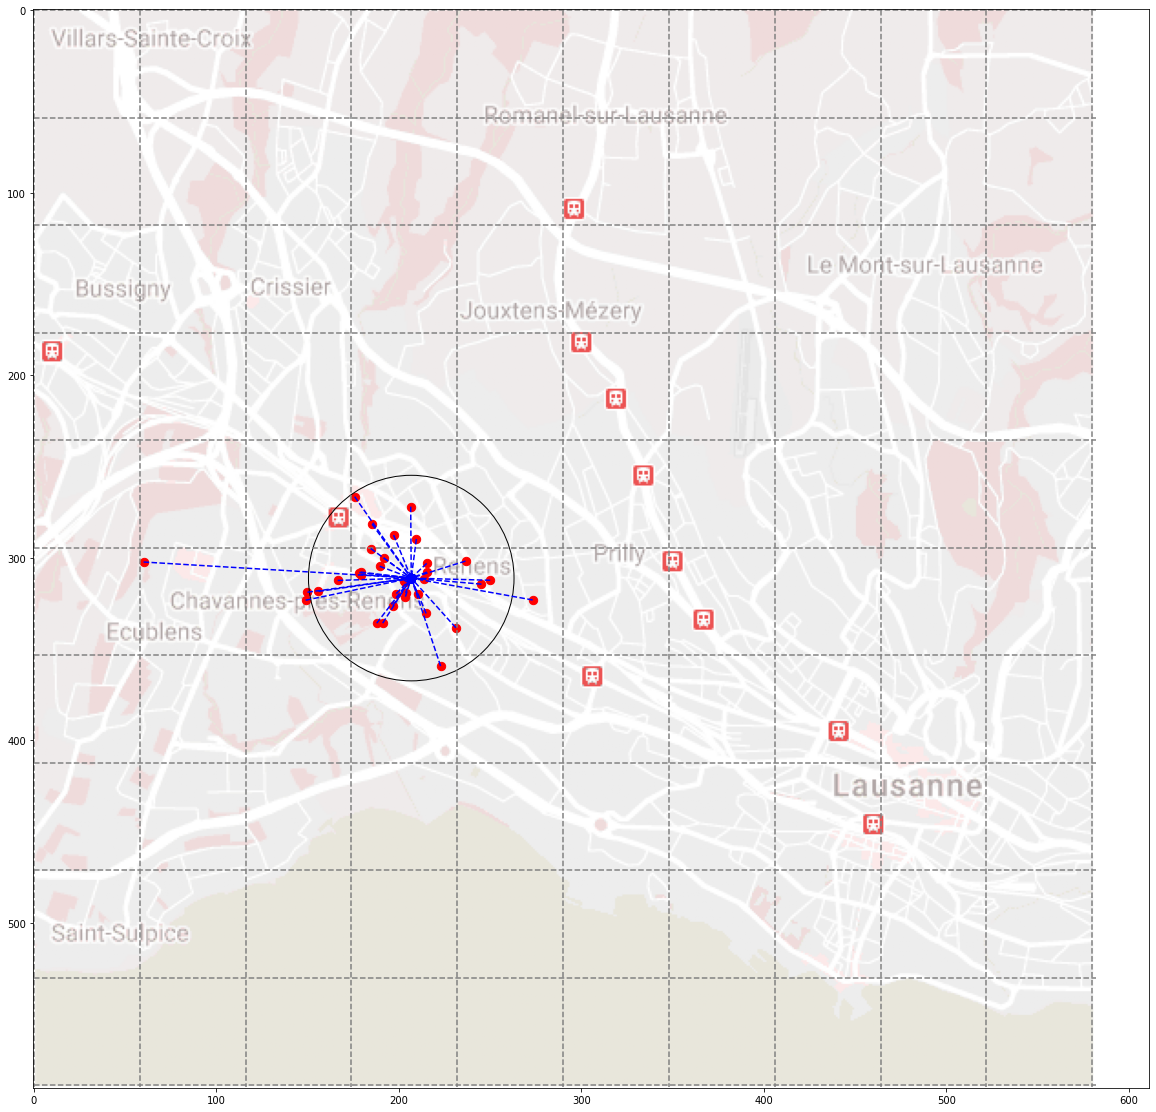

In [46]:
np.random.seed(1)


def perturb(df, scale, amp):
    perturbed = df.copy()
    for i, row in perturbed.iterrows():
        #0 bias with certain scale and use amplification factor due to x,y being pixels
        xr = amp*np.random.laplace(loc = 0, scale = scale)
        yr = amp*np.random.laplace(loc = 0, scale = scale)
        #if location is outside of map, set it to limit
        perturbed.loc[i,'x'] = max(min(row.x + xr, 580), 0)
        perturbed.loc[i,'y'] = max(min(row.y + yr, 589), 0)
        #transform lon lan from new x y
        lo, la = inv_trans(perturbed.loc[i,'x'], perturbed.loc[i,'y'])
        perturbed.loc[i,'lon'] = lo
        perturbed.loc[i,'lat'] = la
    return perturbed


#example for interestings persons locations when he is at home
defensetest = inter_person.loc[inter_person['poi_type'].isin(['villa', 'appartment_block'])]
perturbed = perturb(defensetest, 3.5, 5)
fig, ax = make_map()

for (i,row), (idx, row2) in zip(perturbed.iterrows(), defensetest.iterrows()):
    ax.plot([row.x, row2.x], [row.y, row2.y], '--', c = 'blue')
#provided locations (perturbed) are in red
ax.scatter(perturbed.x, perturbed.y, c = 'red', s = 70)
#real location is in blue
ax.scatter(defensetest.x, defensetest.y, c = 'blue', s = 70)

#count number of homes in radius of certitude from provided perturbed location
#if no homes then draw the point in black
r = 5*laplace.ppf(0.98, scale = 3.5)
circle = plt.Circle((defensetest.iloc[0].x, defensetest.iloc[0].y), r, color = 'black', fill=False)
ax.add_artist(circle)
counts = []
for i, row in perturbed.iterrows():
    t = inside(homes, row.x, row.y, r)
    if t == 1:
        ax.scatter(row.x, row.y, c = 'black', s = 80)
    counts.append(t)
#on average there are 8 homes in radius of provided location
print(min(counts), max(counts), np.mean(counts))

In [47]:
np.random.seed(1)
#perturb all queries done from home and work for testing privacy
perturbed_home_locations = perturb(full_queries.loc[full_queries['poi_type'].isin(['villa', 'appartment_block'])], 6, 5)
perturbed_work_locations = perturb(full_queries.loc[full_queries['poi_type'].isin(['office' ,'laboratory', 'company'])], 6, 5)

## Attack and privacy evaluation

In [48]:
'''
The adversary being strategic, assumes the query was perturbed and tries to guess where the user
really lives

In order to calculate the privacy gain we assume the adversary knows the circle of confidence 
for amp = 5 and scale = 3.5 and for simplicity assumes all provided points are in this circle
with additional margin

'''



r = 5*laplace.ppf(0.98, scale = 6) # since he is smart he assumes circle is bigger (instead of 95%, 98%)




'''
For every query it has received (assuming he knows it was from home) 
the adversary finds all points that fall in this circle
with enough queries he checks the occurances of points and picks the one with highest
'''
import collections  
def attack(queries, pois, r, homeorwork = 'home'):
    #attack time measurement
    t0 = time.time()
    if homeorwork == 'home':
        homes = pois.loc[pois['poi_type'].isin(['villa' ,'appartment_block'])]
    else: 
        homes = pois.loc[pois['poi_type'].isin(['office' ,'laboratory', 'company'])]

    homes_per_ip = {}
    ip = 0
    home_list = [(0,0)]
    
    for i, row in queries.iterrows():
        #if new ip
        if row.ip_address != ip:
            
            occur = collections.defaultdict(int) 
            #count occurances from previous ip
            for elem in home_list: 
                  occur[elem] += 1
            homes_per_ip[ip] = max(occur, key = occur.get)
            home_list = []
            ip = row.ip_address
            
        #else we find all houses in radius of query location and add to home list
        h = homes.loc[(homes.x - row.x)**2 + (homes.y - row.y)**2 <= r**2]
        for idx, row2 in h.iterrows():
            home_list.append((row2.x, row2.y))
            
    #dont forget the last one
    occur = collections.defaultdict(int) 
    for elem in home_list: 
          occur[elem] += 1
    homes_per_ip[ip] = max(occur, key = occur.get)
    
    print("done in {:0.2f}s".format((time.time()-t0)))
    return homes_per_ip

#attack homes using perturbed queries from home
homes_per_ip = attack(perturbed_home_locations, pois, r, 'home')
workplace_per_ip = attack(perturbed_work_locations, pois, r, 'work')

done in 30.11s
done in 18.97s


## Evaluation

found 58.00 out of 200.00 user homes, privacy = 71.00%


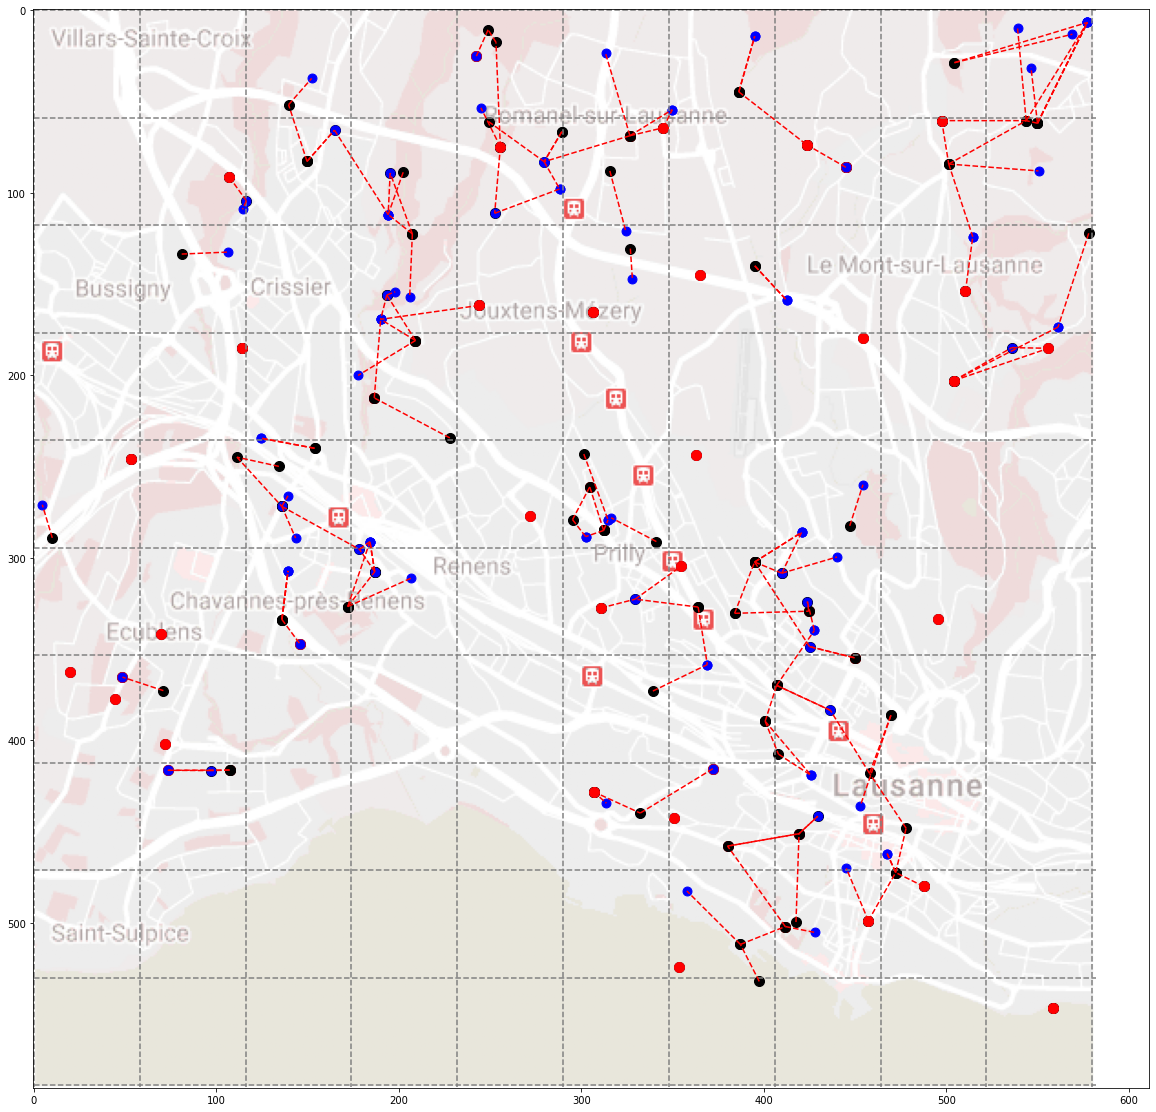

In [49]:
'''
success rate home

privacy = success rate of attacker i.e.

1 - pr(attacker guessed (x,y) | (x', y')) : (x', y') = perturbed(x,y)

= 1 - nb of correct guesses / total guesses in sample
'''
real_homes = full_queries.loc[full_queries['poi_type'].isin(['villa', 'appartment_block'])]
success = 0
ip = 0
fig, ax = make_map()
for idx, row in real_homes.iterrows():
    if row.ip_address != ip:
        ip = row.ip_address
        predx, predy = homes_per_ip[ip]
        #to simplify graph only show 1 out of 7 of home locations
        
        ax.scatter(predx, predy, c = 'black', s = 100, label = 'server prediction')
        ax.scatter(row.x, row.y, c = 'blue', s = 80, label = 'real home location')
        ax.plot([predx, row.x], [predy, row.y], '--', c = 'red')
        if predx == row.x and predy == row.y:
            success += 1
            ax.scatter(predx, predy, c = 'red', s = 100, label = 'real homes the server predicted correctly')
'''
real homes are in blue, while black ones are what the server thought to be his home
for ease to link guess with real home, red dashed line links the corresponding home to guess


correct guesses are marked in red

'''   
print("found {:0.2f} out of {:0.2f} user homes, privacy = {:0.2f}%".format(success, 200, 100 - 100*success/200))

found 106.00 out of 200.00 user workplace, privacy = 47.00


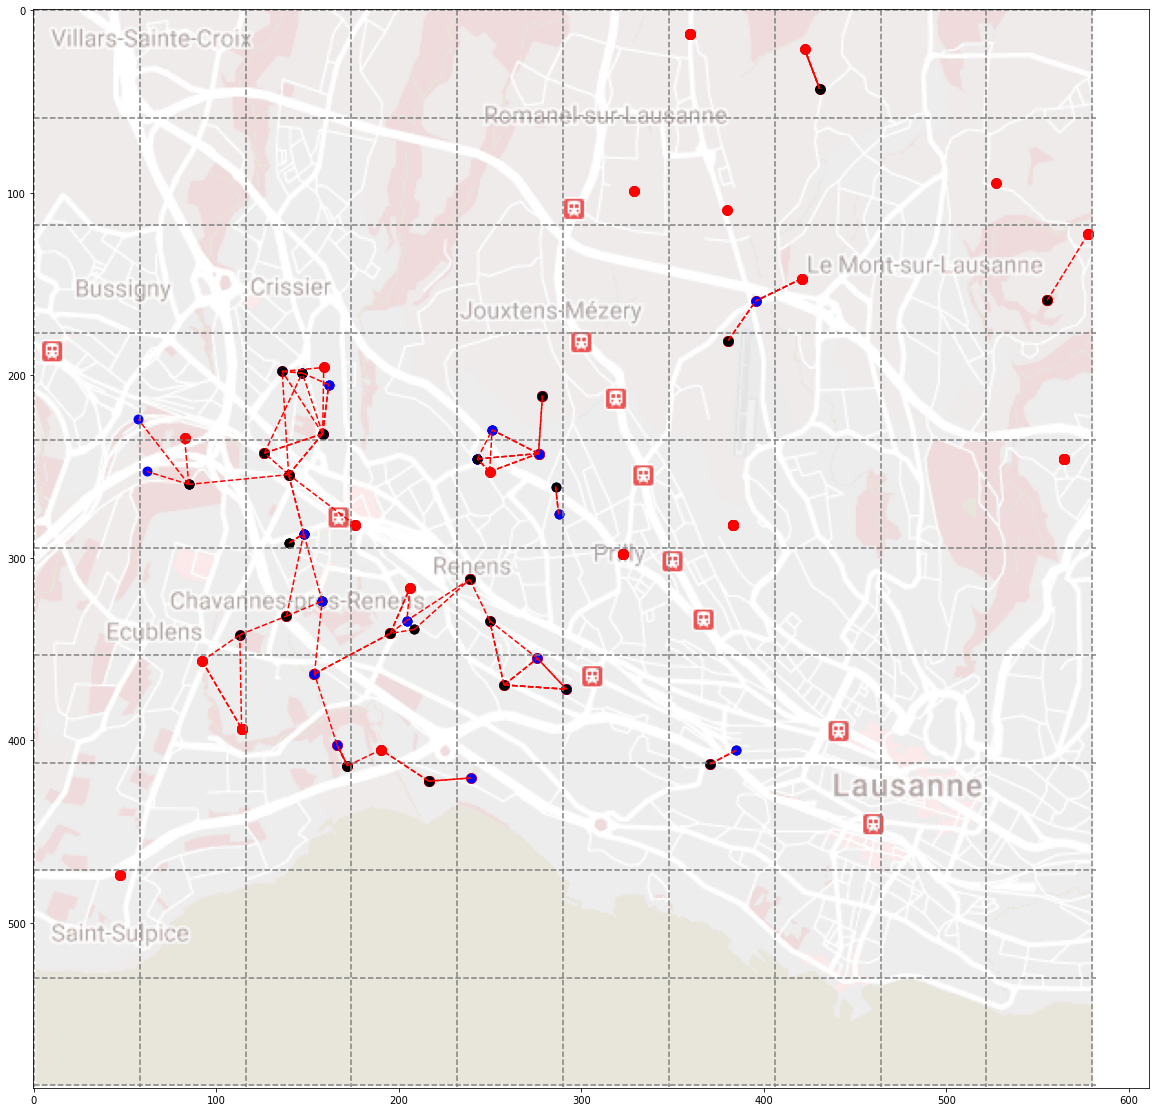

In [50]:
'''
success rate
'''
real_work = full_queries.loc[full_queries['poi_type'].isin(['office' ,'laboratory', 'company'])]
success = 0
ip = 0
fig, ax = make_map()
for idx, row in real_work.iterrows():
    if row.ip_address != ip:
        ip = row.ip_address
        predx, predy = workplace_per_ip[ip]
        ax.scatter(predx, predy, c = 'black', s = 80)
        ax.scatter(row.x, row.y, c = 'blue', s = 80)
        ax.plot([predx, row.x], [predy, row.y], '--', c = 'red')
        if predx == row.x and predy == row.y:
            success += 1
            ax.scatter(predx, predy, c = 'red', s = 100)
   
print("found {:0.2f} out of {:0.2f} user workplace, privacy = {:0.2f}".format(success, 200, 100 - 100*success/200))


## Utility

In [51]:
perturbed_queries = perturb(queries, 6, 5)

In [52]:
'''
Having such high privacy, must come at a price of utility
When server receives a location he returns the poi in the grid where the point is located in

We use measurements for utility:
    strict success rate by checking how often the point stays in the same grid id 
    (which we know is very bad for privacy, due to grids having unique home locations)
    
    and
    
    success where we compute how often the provided point is in the viscinity of the correct grid id
    i.e. how often the provided point is either in the real grid id (strict success) or in one of the 
    adjacent grids
    
    (this is quite logical, since a user being close to a grid border, has a lot of chances to provide a location
    of the adjacent grid, but it stays useful, since it stays closeby to the user)


'''
success = 0
strict_success = 0
for (i, row), (idx, row2) in zip(queries.iterrows(), perturbed_queries.iterrows()):
    pqa, pqb = location_to_cell_id(row2.lat, row2.lon)
    rqa, rqb = location_to_cell_id(row.lat, row.lon)
    if pqa == rqa and pqb == rqb :
        strict_success += 1
    if (pqa == rqa or pqa == rqa + 1 or pqa == rqa -1) and (pqb == rqb or pqb == rqb + 1 or pqb == rqb -1):
        success += 1
print("success rate over all queries is {:0.2f}".format(100*success / len(queries)))
print("strict success rate over all queries is {:0.2f}".format(100*strict_success / len(queries)))

success rate over all queries is 89.05
strict success rate over all queries is 31.32


In [53]:
'''
privacy utility trade-off and time to crack privacy

                        soft utility    hard utility      home privacy             workplace privacy
no defense                   100%          100%           0% (~0.6s)                  0%   (~0.6s)
amp = 5, scale = 1           100%          83.72%         5.5% (13.53s)              0.5% (10.71s)
amp = 5, scale = 2          99.92%         68.62%         18.50% (14.62s)            11.50% (12.20s)                   
amp = 5, scale = 2.5        99.66%         62.08%         28.00% (16.11s)            16.50% (12.03s)
amp = 5, scale = 4          96.97%         45.70%         51.00% (19.97s)            37.00% (14.48s)  
amp = 5, scale = 6          89.05%         31.32%         71.00% (27.78s)            47.00% (20.29s)
amp = 5, scale = 8          78.85%         22.54%         81.00% (37.08s)            58.00% (22.94s)       
amp = 5, scale = 10         68.95%         17.06%         90.00% (47.25s)            68.00% (23.87s)                                  
                                



'''
print('')

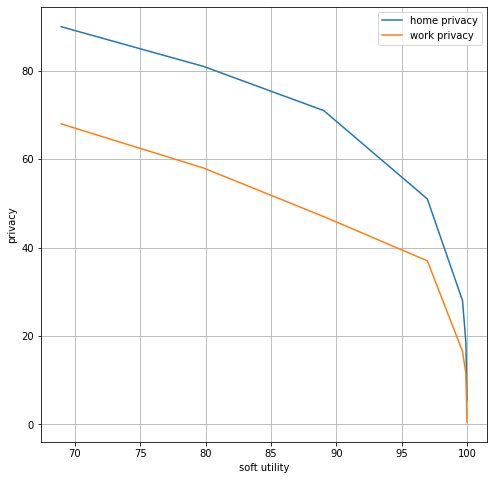

In [54]:
fig, ax1 = plt.subplots(figsize = (8,8))
ax1.set_ylabel("privacy")
ax1.set_xlabel("soft utility")
plt.plot([100, 99.92, 99.66, 96.97, 89.05, 79.85, 68.95], [5.5, 18.50, 28, 51, 71, 81, 90], label='home privacy')
plt.plot([100, 99.92, 99.66, 96.97, 89.05, 79.85, 68.95], [0.5, 11.5, 16.5, 37, 47, 58, 68], label='work privacy')
plt.grid()
plt.legend()

# the curve ressembles a common trade-of curve between two goods. For example in economics the PPE curve
# https://en.wikipedia.org/wiki/Production%E2%80%93possibility_frontier

'''
as 1 variable increases, the cost of reducing the other variable in order to 
increase this variable increases as well, 
thus making it more and more costly to improve even more

The optimal value depends on the user's preference, but we would suggest a scale factor of 6 since since
it gives 71% home privacy with sufficiently good utility. The parameters could also be tweaked depending on
the time of the day to improve utility while the user is not in sensitive locations (such as in bars or clubs)

or could be decided in general by the user to apply privacy as control paradigm

to improve our defense, the user could reduce the number of queries he does from the same location
thus reducing the attack space for the SP. This could be done by caching locally querries and when
an identical query is made, it would look into the cache instead of connecting to the server
'''
print('')

as we can see, the hard utility is just inversely linearly proportional to privacy, which is logical since keeping the same grid id does not improve privacy for most cases


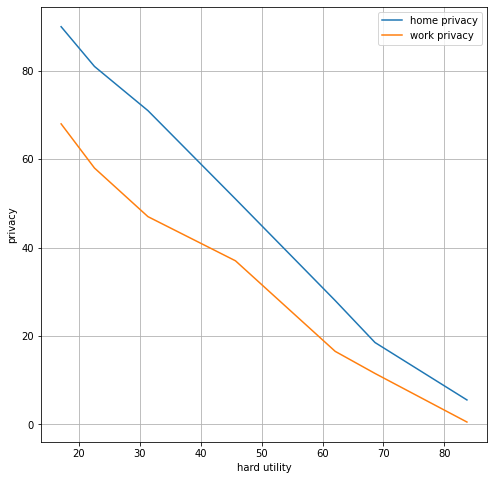

In [55]:
fig, ax1 = plt.subplots(figsize = (8,8))
ax1.set_ylabel("privacy")
ax1.set_xlabel("hard utility")
plt.plot([83.72, 68.62, 62.08, 45.7, 31.32, 22.54, 17.06], [5.5, 18.50, 28, 51, 71, 81, 90], label='home privacy')
plt.plot([83.72, 68.62, 62.08, 45.7, 31.32, 22.54, 17.06], [0.5, 11.5, 16.5, 37, 47, 58, 68], label='work privacy')
plt.grid()
plt.legend()

print("as we can see, the hard utility is just inversely linearly proportional to privacy, which is logical since keeping the same grid id does not improve privacy for most cases")